In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Data processing

In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check the distribution of target class as mostly credit card fraud rate is tiny
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

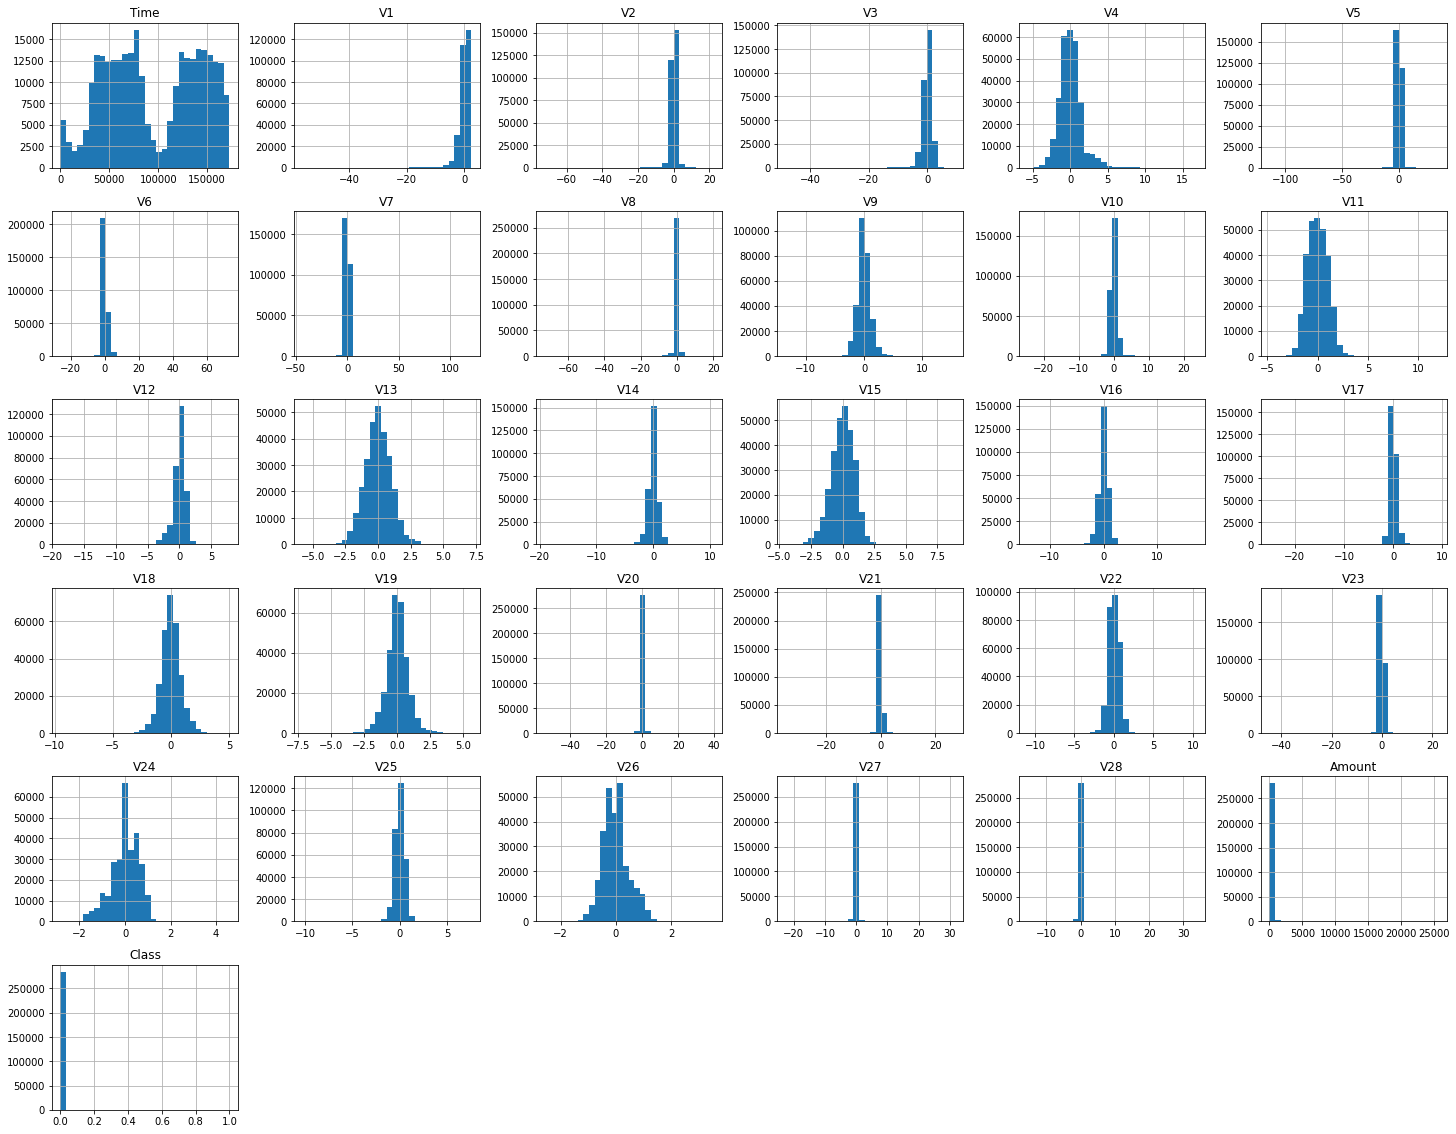

In [7]:
# Check the data distribution
df.hist(bins=30, figsize=(25, 20))

In [8]:
from sklearn.preprocessing import MinMaxScaler
# All fields are numeric but the scalers vary, some algorithms are sensitive to scale, while some are not, so experiments are necesary. First make a copy of scaled dataframe
scaler = MinMaxScaler()

X = df.drop("Class", axis=1)
y = df["Class"]

# Deep copy by default
scaled = scaler.fit_transform(X)

In [9]:
df_scaled = pd.DataFrame(scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

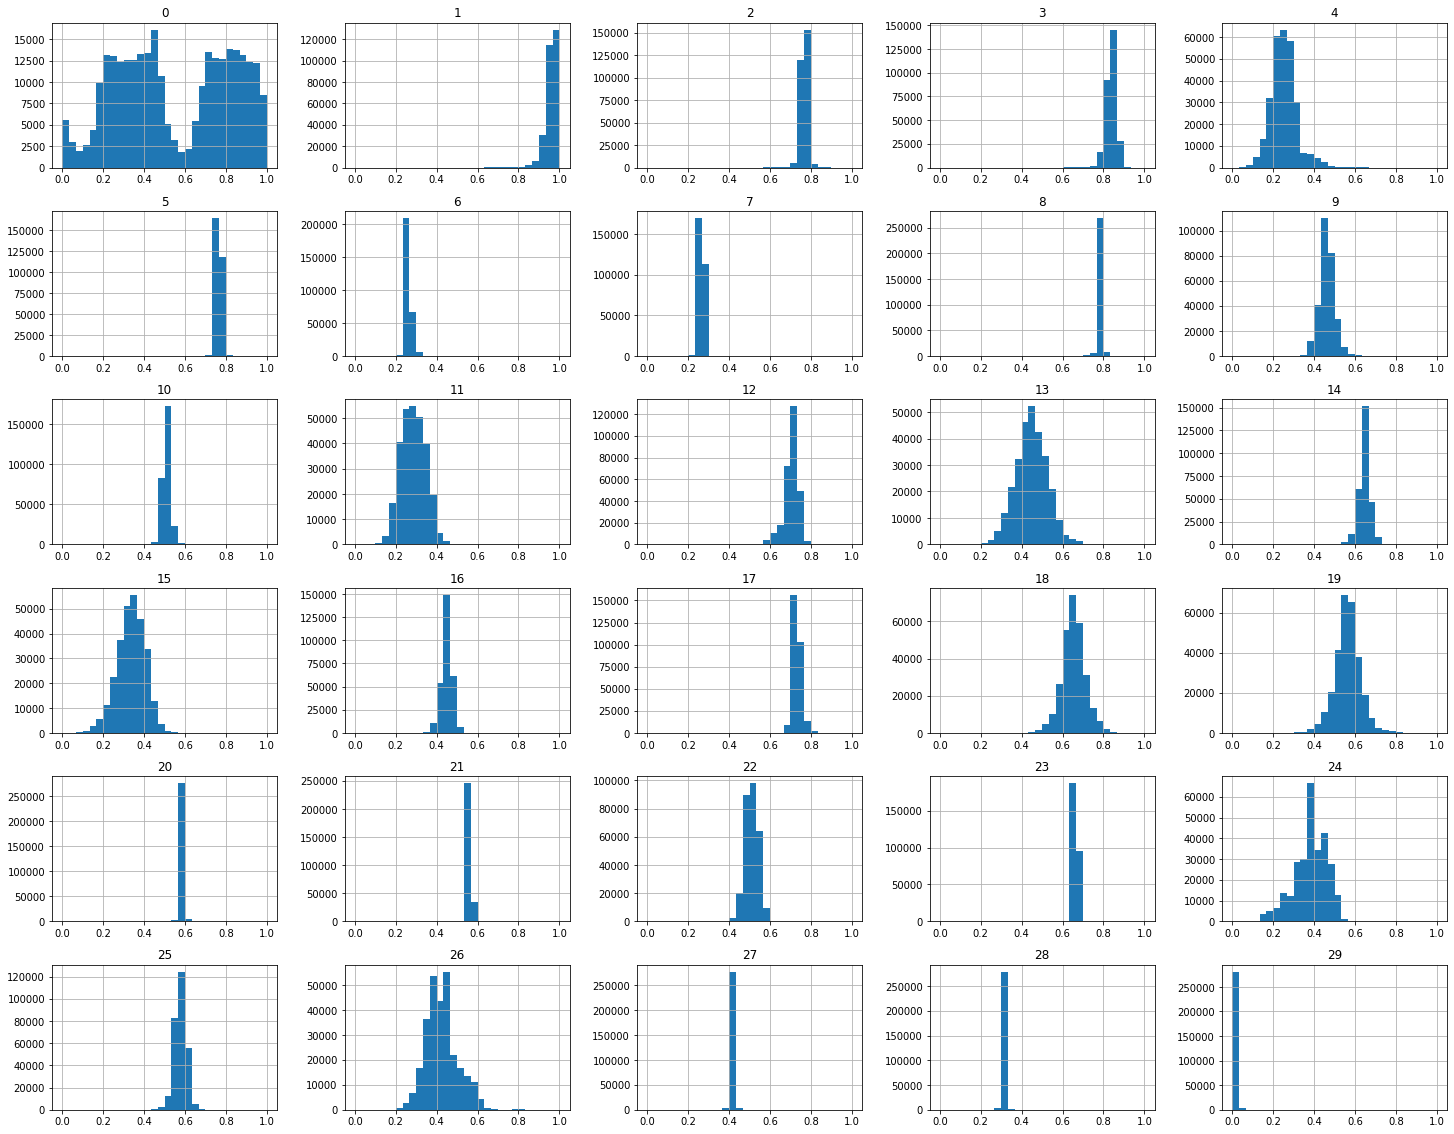

In [10]:
# Check the distribution after scaling
df_scaled.hist(bins=30, figsize=(25, 20))

# Split data into train/validation/test set

In [11]:
from sklearn.model_selection import train_test_split

test_size = 0.2
seed = 42

X_train, X_valid, y_train, y_valid = train_test_split(
    scaled, y, test_size=test_size, random_state=seed)

# Modeling Experiments with H2O

In [12]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpk1gh2dkq
  JVM stdout: /tmp/tmpk1gh2dkq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpk1gh2dkq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 year and 15 days !!!
H2O_cluster_name:,H2O_from_python_unknownUser_qgz032
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.396 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [13]:
# Construct the h2o data frame and split the data into train/valid/test set
X_frame = h2o.H2OFrame(scaled)
y_frame = h2o.H2OFrame(np.array(y))

h2o_df = X_frame.cbind(y_frame)

train_frame, valid_frame, test_frame = h2o_df.split_frame(
    ratios=[0.6,0.2], 
    seed=1234, 
    destination_frames=['train_frame.hex','valid_frame.hex','test_frame.hex']
)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
h2o_df.shape

(284807, 31)

In [15]:
train_frame.head()

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C110
0,0.978542,0.770067,0.840298,0.271796,0.76612,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.48619,0.641219,0.38384,0.464105,0.727794,0.640681,0.55193,0.57953,0.55784,0.480237,0.666938,0.33644,0.58729,0.446013,0.416345,0.313423,0.000104705,0
1.15746e-05,0.938617,0.77652,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.49095,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.62606,0.584615,0.561327,0.547271,0.663392,0.40127,0.566343,0.507497,0.420561,0.31749,0.00272428,0
1.15746e-05,0.951057,0.777393,0.857187,0.244472,0.76855,0.262721,0.268257,0.788178,0.44319,0.501038,0.365045,0.717757,0.420612,0.641442,0.375023,0.462127,0.729441,0.658014,0.560723,0.58117,0.558122,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0.000142851,0
2.31492e-05,0.979184,0.768746,0.8382,0.305241,0.767008,0.265762,0.265324,0.786257,0.478797,0.506668,0.201028,0.698395,0.390194,0.651681,0.340076,0.435245,0.731212,0.611202,0.559756,0.577927,0.558776,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0.00019423,0
4.05111e-05,0.947348,0.78222,0.856031,0.230111,0.772104,0.267324,0.272183,0.744539,0.483978,0.534571,0.248448,0.715178,0.584409,0.60154,0.38762,0.446931,0.69562,0.628655,0.588656,0.578596,0.592809,0.46266,0.666288,0.294686,0.554597,0.417014,0.394234,0.291099,0.00158809,0
4.05111e-05,0.943101,0.770278,0.835452,0.239894,0.783688,0.300439,0.26761,0.794515,0.449275,0.50023,0.243355,0.70003,0.426173,0.648553,0.311748,0.442671,0.716608,0.66146,0.607853,0.580827,0.560296,0.497525,0.662401,0.518546,0.598855,0.362697,0.416728,0.316014,0.00362771,0
5.7873e-05,0.982911,0.754846,0.85325,0.190948,0.752445,0.256694,0.256685,0.785905,0.403515,0.542377,0.356623,0.678886,0.408548,0.642857,0.353591,0.450368,0.738493,0.712051,0.546028,0.576142,0.56133,0.524674,0.665846,0.449678,0.592016,0.404298,0.417302,0.313454,0.000303606,0
5.7873e-05,0.964834,0.773759,0.822263,0.247762,0.785405,0.296369,0.268222,0.791159,0.443527,0.515131,0.269877,0.6919,0.441361,0.658253,0.405769,0.445234,0.707595,0.678051,0.618577,0.581607,0.562284,0.521153,0.665569,0.51654,0.534835,0.345047,0.417295,0.312021,0.00038885,0
5.7873e-05,0.97953,0.754368,0.844067,0.197188,0.755717,0.255447,0.261156,0.782945,0.390645,0.536109,0.298824,0.695046,0.541638,0.635373,0.390577,0.423414,0.756523,0.594984,0.509963,0.579171,0.557743,0.487486,0.666691,0.435168,0.586951,0.367461,0.416999,0.313985,0.00472925,0
6.36604e-05,0.976461,0.770294,0.851772,0.372174,0.764515,0.266413,0.264766,0.78663,0.455164,0.518244,0.239279,0.716381,0.447474,0.640052,0.287319,0.442994,0.734733,0.585857,0.486557,0.578634,0.560885,0.513502,0.664373,0.396348,0.608682,0.442452,0.416908,0.313556,0.00107041,0


In [16]:
# set the target variable to be categorical
h2o_df["C110"] = h2o_df["C110"].asfactor()
train_frame["C110"] = train_frame["C110"].asfactor()
valid_frame["C110"] = valid_frame["C110"].asfactor()
test_frame["C110"] = test_frame["C110"].asfactor()

In [17]:
predictors = train_frame.columns[:-1]
response = train_frame.columns[-1]

print(f"Modeling experiments on fields: {predictors} to predict the target: {response}")

Modeling experiments on fields: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30'] to predict the target: C110


# Random Forest

In [18]:
from h2o.estimators import H2ORandomForestEstimator

# Use the default params to train a baseline random forest model
rf_model = H2ORandomForestEstimator(  binomial_double_trees=True)
                                    

rf_model.train(x=predictors,
               y=response,
               training_frame=train_frame,
               validation_frame=valid_frame)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [19]:
# Check model performance
perf = rf_model.model_performance(test_frame)
print(f"Model F1 score: {perf.F1()}\n")
print(f"Model AUC: {perf.auc()}\n")

perf

Model F1 score: [[0.3800040129942291, 0.86]]

Model AUC: 0.9471883859358338


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.00047469397318502794
RMSE: 0.021787472849897665
LogLoss: 0.00548033626929949
Mean Per-Class Error: 0.06989514480798842
AUC: 0.9471883859358338
AUCPR: 0.8252014545106907
Gini: 0.8943767718716675

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3800040129942291: 


,,0,1,Error,Rate
0,0,56608.0,11.0,0.0002,(11.0/56619.0)
1,1,17.0,86.0,0.165,(17.0/103.0)
2,Total,56625.0,97.0,0.0005,(28.0/56722.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.380004,0.860000,33.0
1,max f2,0.300000,0.849609,36.0
2,max f0point5,0.627451,0.898345,19.0
3,max accuracy,0.400000,0.999506,31.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.380004,0.860141,33.0
8,max min_per_class_accuracy,0.000041,0.883495,367.0
9,max mean_per_class_accuracy,0.020296,0.930105,123.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010031,2.000057e-02,86.137458,86.137458,0.156415,1.725763e-01,0.156415,0.172576,0.864078,0.864078,8513.745798,8513.745798,0.855600
1,2,0.020010,8.003428e-04,0.000000,43.182567,0.000000,8.964660e-03,0.078414,0.090987,0.000000,0.864078,-100.000000,4218.256704,0.845603
2,3,0.030006,3.382316e-04,0.000000,28.796835,0.000000,4.814013e-04,0.052291,0.060836,0.000000,0.864078,-100.000000,2779.683525,0.835589
3,4,0.040178,2.531005e-04,0.000000,21.506017,0.000000,2.899852e-04,0.039052,0.045507,0.000000,0.864078,-100.000000,2050.601737,0.825398
4,5,0.050016,1.298074e-04,0.000000,17.276071,0.000000,1.964485e-04,0.031371,0.036595,0.000000,0.864078,-100.000000,1627.607106,0.815543
5,6,0.100067,4.545454e-05,0.193976,8.732014,0.000352,6.716939e-05,0.015856,0.018325,0.009709,0.873786,-80.602359,773.201420,0.775127
6,7,0.150171,2.896452e-05,0.581315,6.012563,0.001056,3.617426e-05,0.010918,0.012223,0.029126,0.902913,-41.868505,501.256277,0.754111
7,8,0.200786,1.628672e-05,0.575443,4.641945,0.001045,2.062627e-05,0.008429,0.009147,0.029126,0.932039,-42.455692,364.194458,0.732583
8,9,0.302704,8.399832e-06,0.095260,3.111113,0.000173,1.256928e-05,0.005649,0.006071,0.009709,0.941748,-90.473983,211.111274,0.640206
9,10,0.401026,4.807692e-06,0.098745,2.372555,0.000179,5.873148e-06,0.004308,0.004584,0.009709,0.951456,-90.125533,137.255484,0.551432


In [20]:
rf_model.summary()


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,100.0,184714.0,17.0,20.0,19.87,120.0,180.0,142.57


In [21]:
# Retrieve the variable importance
varimp = rf_model.varimp(use_pandas=True)
varimp

,variable,relative_importance,scaled_importance,percentage
0,C18,3785.974121,1.000000,0.181789
1,C15,3000.096436,0.792424,0.144054
2,C13,2788.600342,0.736561,0.133898
3,C12,1941.342896,0.512772,0.093216
4,C17,1617.156494,0.427144,0.077650
5,C11,1175.103149,0.310383,0.056424
6,C19,1018.258301,0.268955,0.048893
7,C10,652.537781,0.172357,0.031332
8,C5,640.525391,0.169184,0.030756
9,C8,396.363586,0.104693,0.019032


## Random Forest Cross-Validation Results

In [24]:
rf_cv = H2ORandomForestEstimator(  binomial_double_trees=True,  nfolds = 5)

# During cross-validation, the train set and validation set are combined together in order to get more data in training
rf_cv.train(x=predictors,
               y=response,
               training_frame=train_frame.rbind(valid_frame)
               )

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [27]:
rf_cv_summary = rf_cv.cross_validation_metrics_summary().as_data_frame()
rf_cv_summary

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9995791,5.6917637E-5,0.9996066,0.9994967,0.9995828,0.9995594,0.9996498
1,auc,0.9625037,0.013712738,0.9763071,0.9701854,0.97058916,0.94783235,0.9476043
2,err,4.2092637E-4,5.6917634E-5,3.9338242E-4,5.033153E-4,4.1716069E-4,4.4062568E-4,3.5014772E-4
3,err_count,19.2,2.588436,18.0,23.0,19.0,20.0,16.0
4,f0point5,0.89586574,0.020908562,0.8791209,0.91649693,0.8746356,0.91939545,0.88967973
5,f1,0.8667402,0.017335795,0.84210527,0.8866995,0.8633093,0.8795181,0.86206895
6,f2,0.83964175,0.019654768,0.8080808,0.85877866,0.85227275,0.8429561,0.8361204
7,lift_top_group,88.21492,2.5869503,84.98032,86.87817,91.44088,87.62115,90.15407
8,logloss,0.0033746036,0.0011900053,0.002645051,0.0052452125,0.0025789342,0.0038875812,0.0025162387
9,max_per_class_error,0.1774052,0.023117762,0.21311475,0.1588785,0.15492958,0.17977528,0.18032786


In [40]:
rf_cv_perf = rf_cv.model_performance(test_frame)
print(f"F1 score of Random Forest cross-validation: {rf_cv_perf.F1()}")
print(f"auc of Random Forest cross-validation: {rf_cv_perf.auc()}")

F1 score of cross-validation: [[0.4489795918367347, 0.8736842105263158]]
auc of cross-validation: 0.9698608841212005


# Gradient Boosting Machines

In [31]:
from h2o.estimators import H2OGradientBoostingEstimator

gbm_model = H2OGradientBoostingEstimator()
    
gbm_model.train(x=predictors,
               y=response,
               training_frame=train_frame,
               validation_frame=valid_frame)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [32]:
gbm_perf = gbm_model.model_performance(test_frame)
print(f"Model F1 score: {gbm_perf.F1()}")
print(f"Model auc: {gbm_perf.auc()}")

gbm_perf

Model F1 score: [[0.7340435756355028, 0.7586206896551724]]
Model auc: 0.8476658063770489

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0008713643711458966
RMSE: 0.029518881603914072
LogLoss: 0.021232444774545698
Mean Per-Class Error: 0.12505939462155236
AUC: 0.8476658063770489
AUCPR: 0.6028062092576078
Gini: 0.6953316127540978

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7340435756355028: 


,,0,1,Error,Rate
0,0,56596.0,23.0,0.0004,(23.0/56619.0)
1,1,26.0,77.0,0.2524,(26.0/103.0)
2,Total,56622.0,100.0,0.0009,(49.0/56722.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,7.340436e-01,0.758621,8.0
1,max f2,7.340436e-01,0.751953,8.0
2,max f0point5,1.000000e+00,0.781585,0.0
3,max accuracy,1.000000e+00,0.999154,0.0
4,max precision,1.000000e+00,0.802198,0.0
5,max recall,1.000000e-19,1.000000,140.0
6,max specificity,1.000000e+00,0.999682,0.0
7,max absolute_mcc,7.340436e-01,0.758271,8.0
8,max min_per_class_accuracy,2.125999e-04,0.815534,64.0
9,max mean_per_class_accuracy,2.436975e-04,0.874941,62.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.20 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.044180,2.176238e-04,17.580177,17.580177,0.031923,0.041047,0.031923,0.041047,0.776699,0.776699,1658.017651,1658.017651,0.733851
1,2,0.094408,2.125999e-04,0.773182,8.638416,0.001404,0.000213,0.015686,0.019322,0.038835,0.815534,-22.681779,763.841614,0.722438
2,3,0.995081,1.898528e-04,0.086235,0.897619,0.000157,0.000190,0.001630,0.002005,0.077670,0.893204,-91.376464,-10.238097,-0.102063
3,4,1.000000,1.000000e-19,21.712148,1.000000,0.039427,0.000036,0.001816,0.001995,0.106796,1.000000,2071.214810,0.000000,0.000000


### GBM hyper param tuning

Reference of tuning GBM can be found in the [H2O official tutorial](https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/gbm/gbmTuning.ipynb).

In [33]:
from h2o.grid.grid_search import H2OGridSearch

# Firstly make a cross-validation to see the average performance

cv_gbm = H2OGradientBoostingEstimator(nfolds = 5)
cv_gbm.train(x = predictors, y = response, training_frame=train_frame.rbind(valid_frame))

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [34]:
# check cross-validation results
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary ## Full summary of all metrics

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9992768,1.3408092E-4,0.9993386,0.9990392,0.9993197,0.99936485,0.99932176
1,auc,0.8347335,0.04016712,0.8174237,0.7794132,0.8744798,0.87323433,0.8291164
2,err,7.231857E-4,1.3408092E-4,6.613611E-4,9.6084556E-4,6.8034674E-4,6.3515705E-4,6.7821826E-4
3,err_count,33.0,6.204837,30.0,44.0,31.0,29.0,31.0
4,f0point5,0.8053556,0.067880064,0.8064516,0.6939502,0.82051283,0.8780488,0.8278146
5,f1,0.76186705,0.0739968,0.7692308,0.6393443,0.8050314,0.8323699,0.7633588
6,f2,0.7235094,0.08139898,0.7352941,0.5927052,0.79012346,0.7912088,0.7082153
7,lift_top_group,26.642483,20.4335,14.160027,62.61006,15.791302,16.928698,23.722326
8,logloss,0.017148234,0.0022676578,0.016750546,0.021006197,0.016972847,0.015730554,0.015281022
9,max_per_class_error,0.2996752,0.08629926,0.2857143,0.4347826,0.2195122,0.23404256,0.3243243


Note that the average f1 and auc are similar to previous results without cross-validation, but note that the `standard deviation` of this model is very large - `1%`

In [39]:
## Get the cross-validated AUC by scoring the combined holdout predictions.
## (Instead of taking the average of the metrics across the folds)
cv_gbm_perf = cv_gbm.model_performance(test_frame)
print(f"F1 score of GBM cross-validation: {cv_gbm_perf.F1()}")
print(f"auc of GBM cross-validation: {cv_gbm_perf.auc()}")

F1 score of cross-validation: [[0.9835404212953058, 0.7936507936507937]]
auc of cross-validation: 0.8404466269770843


#### Make a grid search

Typically there are some params that are more important over others, like `max_depth, col and row sample rate etc.` for GBM. So in the grid search the candidates of those critical params are added so that tuning efficiency can be encouraging.

In [ ]:
import math
# create hyperameter and search criteria lists (ranges are inclusive..exclusive))
hyper_params_tune = {'max_depth' : list(range(5,15+1,1)),
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(train_frame.nrow,2)-1)+1)],
                'nbins': [2**x for x in range(4,11)],
                'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]}

search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 100,  ## build no more than 100 models
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "AUC",
                   'stopping_tolerance': 1e-3
                   }

In [ ]:
gbm_final_grid = H2OGradientBoostingEstimator(distribution='bernoulli',
                    ## more trees is better if the learning rate is small enough 
                    ## here, use "more than enough" trees - we have early stopping
                    ntrees=10000,
                    ## smaller learning rate is better
                    ## since we have learning_rate_annealing, we can afford to start with a 
                    #bigger learning rate
                    learn_rate=0.05,
                    ## learning rate annealing: learning_rate shrinks by 1% after every tree 
                    ## (use 1.00 to disable, but then lower the learning_rate)
                    learn_rate_annealing = 0.99,
                    ## score every 10 trees to make early stopping reproducible 
                    #(it depends on the scoring interval)
                    score_tree_interval = 10,
                    ## fix a random number generator seed for reproducibility
                    seed = 1234,
                    ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
                    #5 consecutive scoring events
                    stopping_rounds = 5,
                    stopping_metric = "AUC",
                    stopping_tolerance = 1e-4)
            
#Build grid search with previously made GBM and hyper parameters
final_grid = H2OGridSearch(gbm_final_grid, hyper_params = hyper_params_tune,
                                    grid_id = 'final_grid',
                                    search_criteria = search_criteria_tune)

final_grid.train(x=predictors,
               y=response,
                  ## early stopping based on timeout (no model should take more than 1 hour - modify as needed)
           max_runtime_secs=3600, 
               training_frame=train_frame,
               validation_frame=valid_frame)


print(final_grid)

In [ ]:
## Sort the grid models by auc
sorted_final_grid = final_grid.get_grid(sort_by='auc',decreasing=True)
sorted_final_grid

In [ ]:
#Get the best model from the list (the model name listed at the top of the table)
best_model = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
performance_best_model = best_model.model_performance(test_frame)
print(f"Best model's AUC: {performance_best_model.auc()}")
print(f"Best model's F1 score: {performance_best_model.F1()}\n")
performance_best_model

⚠️**Note**: In fact the model performance on the test set is not better than the first `lucky param` model whose cross-validation F1 score is `0.83`, it is not unusual as grid search only loops the pre-determined parameters set up beforehand, so it is not guranteed that the global best options can be found for sure. Despite this, can move forward to see how to integrate the params found by the grid search and re-train a new model.

Inspect the parameters of the best model as below.

In [ ]:
params_list = []
for key, value in best_model.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

Now we can confirm that these parameters are generally sound, by building a GBM model on the whole dataset (instead of the 60%) and using internal 5-fold cross-validation (re-using all other parameters including the seed):

In [ ]:
gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
#get the parameters from the Random grid search model and modify them slightly
params = gbm.params
new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
for key in new_params.keys():
    params[key]['actual'] = new_params[key] 
gbm_best = H2OGradientBoostingEstimator()
for key in params.keys():
    if key in dir(gbm_best) and getattr(gbm_best,key) != params[key]['actual']:
        setattr(gbm_best,key,params[key]['actual']) 

In [ ]:
# h2o_df is the whole dataset
gbm_best.train(x=predictors, y=response, training_frame=h2o_df)

In [ ]:
print(gbm_best.cross_validation_metrics_summary())

let's just scan through the top 5 models based on the grid search and cross-validate their parameters with nfolds=5 on the entire dataset:

In [ ]:
for i in range(5): 
    gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][i])
    #get the parameters from the Random grid search model and modify them slightly
    params = gbm.params
    new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
    for key in new_params.keys():
        params[key]['actual'] = new_params[key]
    new_model = H2OGradientBoostingEstimator()
    for key in params.keys():
        if key in dir(new_model) and getattr(new_model,key) != params[key]['actual']:
            setattr(new_model,key,params[key]['actual'])
    new_model.train(x = predictors, y = response, training_frame = h2o_df)  
    cv_summary = new_model.cross_validation_metrics_summary().as_data_frame()
    print(gbm.model_id)
    print(cv_summary.iloc[1]) ## AUC

Normally the test set should not be used twice so above is just a trial but not a good practice. We will still use the best model based on the grid search and see the prediction.

**Note:** the threshold of labels is based on the value that gives best F1 score.

In [ ]:
preds = best_model.predict(test_frame)
preds.head()

In [ ]:
performance_best_model_valid_set = best_model.model_performance(valid_frame)
print(f"Best model's AUC on the validation set: {performance_best_model_valid_set.auc()}")
print(f"Best model's F1 score on the validation set: {performance_best_model_valid_set.F1()}\n")
performance_best_model_valid_set

## Ensamble the model's predictions

In [ ]:
prob = None
k=10
for i in range(0,k): 
    gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][i])
    if (prob is None):
        prob = gbm.predict(test_frame)["p1"]
    else:
        prob = prob + gbm.predict(test_frame)["p1"]
prob = prob/k

In [ ]:
from sklearn.metrics import roc_auc_score
# convert prob and test[response] h2oframes to pandas' frames and then convert them each to numpy array
np_array_prob = prob.as_data_frame().values
np_array_test = test_frame[response].as_data_frame().values
probInPy = np_array_prob
labeInPy = np_array_test
# compare true scores (test[response]) to probability scores (prob)
roc_auc_score(labeInPy, probInPy)

# XGBoost

In [22]:
from h2o.estimators import H2OXGBoostEstimator

# Build and train the model:
xgb = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)

xgb.train(x=predictors,
               y=response,
               training_frame=train_frame,
               validation_frame=valid_frame)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [23]:
xgb_perf = xgb.model_performance(test_frame)
print(f"F1 score of the XGBoost: {xgb_perf.F1()}")
print(f"AUC of the XGBoost: {xgb_perf.auc()}")

xgb_perf

F1 score of the XGBoost: [[0.3334878385066986, 0.864321608040201]]
AUC of the XGBoost: 0.9741009441922907

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0004455637406796965
RMSE: 0.021108380816152066
LogLoss: 0.0031251434054184366
Mean Per-Class Error: 0.05467237403753278
AUC: 0.9741009441922907
AUCPR: 0.8454717293881618
Gini: 0.9482018883845813

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3334878385066986: 


,,0,1,Error,Rate
0,0,56609.0,10.0,0.0002,(10.0/56619.0)
1,1,17.0,86.0,0.165,(17.0/103.0)
2,Total,56626.0,96.0,0.0005,(27.0/56722.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.333488,0.864322,83.0
1,max f2,0.333488,0.846457,83.0
2,max f0point5,0.843047,0.902935,72.0
3,max accuracy,0.420819,0.999524,81.0
4,max precision,0.999396,1.000000,0.0
5,max recall,0.000007,1.000000,393.0
6,max specificity,0.999396,1.000000,0.0
7,max absolute_mcc,0.333488,0.864620,83.0
8,max min_per_class_accuracy,0.000133,0.932039,343.0
9,max mean_per_class_accuracy,0.000614,0.945328,285.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010014,9.171407e-04,88.228190,88.228190,0.160211,0.163916,0.160211,0.163916,0.883495,0.883495,8722.818953,8722.818953,0.875070
1,2,0.020010,3.880777e-04,1.942501,45.123357,0.003527,0.000583,0.081938,0.082322,0.019417,0.902913,94.250098,4412.335657,0.884509
2,3,0.030006,2.505268e-04,0.000000,30.091075,0.000000,0.000311,0.054642,0.055001,0.000000,0.902913,-100.000000,2909.107503,0.874495
3,4,0.040002,1.814944e-04,0.000000,22.571622,0.000000,0.000214,0.040987,0.041310,0.000000,0.902913,-100.000000,2157.162173,0.864480
4,5,0.050016,1.432048e-04,1.939081,18.440750,0.003521,0.000161,0.033486,0.033071,0.019417,0.922330,93.908109,1744.075001,0.873901
5,6,0.100014,6.356418e-05,0.194182,9.319074,0.000353,0.000093,0.016922,0.016585,0.009709,0.932039,-80.581840,831.907400,0.833538
6,7,0.150012,3.918748e-05,0.000000,6.213081,0.000000,0.000050,0.011282,0.011074,0.000000,0.932039,-100.000000,521.308107,0.783449
7,8,0.200011,2.823651e-05,0.194182,4.708489,0.000353,0.000033,0.008550,0.008314,0.009709,0.941748,-80.581840,370.848883,0.743086
8,9,0.300007,1.760434e-05,0.194182,3.203808,0.000353,0.000022,0.005818,0.005550,0.019417,0.961165,-80.581840,220.380818,0.662361
9,10,0.400004,1.218818e-05,0.194182,2.451435,0.000353,0.000015,0.004451,0.004166,0.019417,0.980583,-80.581840,145.143470,0.581635


### Cross-validation of XGBoost

In [25]:
xgb_cv = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234,
                            nfolds = 5)

# During cross-validation, the train set and validation set are combined together in order to get more data in training
xgb_cv.train(x=predictors,
               y=response,
               training_frame=train_frame.rbind(valid_frame)
               )

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [26]:
xgb_cv_summary = xgb_cv.cross_validation_metrics_summary().as_data_frame()
xgb_cv_summary

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9996097,5.9311176E-5,0.9995844,0.9995832,0.9996727,0.99953824,0.99967015
1,auc,0.97636425,0.0072169453,0.9818275,0.9833635,0.9654159,0.97354716,0.97766733
2,err,3.902626E-4,5.9311176E-5,4.156185E-4,4.1682206E-4,3.272751E-4,4.6173128E-4,3.2986607E-4
3,err_count,17.8,2.6832817,19.0,19.0,15.0,21.0,15.0
4,f0point5,0.9184695,0.029812835,0.8760108,0.9287532,0.9433962,0.8997429,0.9444444
5,f1,0.87751615,0.008723289,0.8724832,0.8848485,0.8888889,0.8695652,0.8717949
6,f2,0.8410195,0.021152299,0.868984,0.8449074,0.84033614,0.84134614,0.8095238
7,lift_top_group,88.09115,3.2478042,90.4984,88.73095,91.75776,84.67051,84.798134
8,logloss,0.0027893295,4.276303E-4,0.0024127895,0.0029048622,0.0024634486,0.0034687293,0.0026968187
9,max_per_class_error,0.18120822,0.033548985,0.13333334,0.17977528,0.1891892,0.1764706,0.22727273


In [38]:
xgb_cv_perf = xgb_cv.model_performance(test_frame)

print(f"F1 score of cross-validation: {xgb_cv_perf.F1()}")
print(f"auc of cross-validation: {xgb_cv_perf.auc()}")

F1 score of cross-validation: [[0.7235603332519531, 0.8842105263157896]]
auc of cross-validation: 0.9719653956774948


By far, XGBoost gives the best cross-validation results with the default hyper params. Next, a random search is performed to see if a better-perfoming model can be found.

## XGBoost random search

**Note:**

For the set up of search space of each param, it is suggested to extend the lower and upper bound of the default value, say the `default value of learn_rate` is 0.3, then a search space from `0.1 - 0.5` is better than a space from `0.01 - 0.3`. 

But for param like the sample rate whose upper limit should not exceed 1.0, then the search space should be within `(0.0 - 1.0]`.

In [43]:
from h2o.grid.grid_search import H2OGridSearch

# GBM hyperparameters
gbm_params = {'learn_rate': [i * 0.02 for i in range(1, 26,2)],
                'max_depth': list(range(2, 15)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 48, 'seed': 1234}

xgb_search = H2OXGBoostEstimator(booster='dart',
                            normalize_type="tree"
                            )


# Train and validate a random grid of GBMs
xgb_grid = H2OGridSearch(model=xgb_search,
                          grid_id='xgb_random_search',
                          hyper_params=gbm_params,
                          search_criteria=search_criteria)

xgb_grid.train(x=predictors, y=response,
                training_frame=train_frame,
                validation_frame=valid_frame,
                ntrees=100,
                seed=1234)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


Get the result of random search and check the performance of the best model

In [46]:
# Get the grid results, sorted by validation F1
xgb_gridperf = xgb_grid.get_grid(sort_by='f1', decreasing=True)
xgb_gridperf

          col_sample_rate learn_rate max_depth         sample_rate  \
0                     0.8       0.14         9  0.6000000000000001   
1                     1.0       0.14         8  0.7000000000000001   
2                     0.5       0.18        12                 0.5   
3                     0.9       0.46         4  0.7000000000000001   
4                     0.5       0.06        14                 0.5   
5      0.7000000000000001       0.22         7  0.6000000000000001   
6                     0.9       0.42         8                 1.0   
7     0.30000000000000004       0.38         4  0.7000000000000001   
8                     0.9       0.14        12  0.7000000000000001   
9                     0.9       0.26         7  0.6000000000000001   
10                    0.8        0.3         5  0.6000000000000001   
11    0.30000000000000004       0.46        13                 1.0   
12                    0.9       0.38         3  0.6000000000000001   
13                  

In [47]:
# Grab the top GBM model, chosen by validation F1
best_xgb = xgb_gridperf.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_xgb_perf = best_xgb.model_performance(test_frame)

print(f"F1 of the best XGBoost model: {best_xgb_perf.F1()}")
print(f"AUC of the best XGBoost model: {best_xgb_perf.auc()}")
print(f"Recall of the best XGBoost model: {best_xgb_perf.recall()}")

best_xgb_perf

F1 of the best XGBoost model: [[0.24732519686222076, 0.8629441624365481]]
AUC of the best XGBoost model: 0.9797242923530594
Recall of the best XGBoost model: [[1.0854340270568481e-05, 1.0]]

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0004308917163315174
RMSE: 0.020757931407814158
LogLoss: 0.002884268222354444
Mean Per-Class Error: 0.04945859369654804
AUC: 0.9797242923530594
AUCPR: 0.8489706590632313
Gini: 0.9594485847061187

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24732519686222076: 


,,0,1,Error,Rate
0,0,56610.0,9.0,0.0002,(9.0/56619.0)
1,1,18.0,85.0,0.1748,(18.0/103.0)
2,Total,56628.0,94.0,0.0005,(27.0/56722.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.247325,0.862944,82.0
1,max f2,0.083264,0.843137,86.0
2,max f0point5,0.824398,0.916473,70.0
3,max accuracy,0.824398,0.999524,70.0
4,max precision,0.999521,1.000000,0.0
5,max recall,0.000011,1.000000,393.0
6,max specificity,0.999521,1.000000,0.0
7,max absolute_mcc,0.247325,0.863611,82.0
8,max min_per_class_accuracy,0.000215,0.932039,333.0
9,max mean_per_class_accuracy,0.000562,0.950541,296.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010014,0.001381,88.228190,88.228190,0.160211,0.158759,0.160211,0.158759,0.883495,0.883495,8722.818953,8722.818953,0.875070
1,2,0.020010,0.000643,1.942501,45.123357,0.003527,0.000924,0.081938,0.079911,0.019417,0.902913,94.250098,4412.335657,0.884509
2,3,0.030006,0.000411,1.942501,30.738195,0.003527,0.000511,0.055817,0.053460,0.019417,0.922330,94.250098,2973.819493,0.893947
3,4,0.040002,0.000303,0.000000,23.057033,0.000000,0.000350,0.041869,0.040188,0.000000,0.922330,-100.000000,2205.703295,0.883933
4,5,0.050016,0.000239,0.000000,18.440750,0.000000,0.000270,0.033486,0.032196,0.000000,0.922330,-100.000000,1744.075001,0.873901
5,6,0.100014,0.000116,0.582545,9.513221,0.001058,0.000165,0.017275,0.016183,0.029126,0.951456,-41.745519,851.322137,0.852991
6,7,0.150012,0.000076,0.194182,6.407240,0.000353,0.000092,0.011635,0.010820,0.009709,0.961165,-80.581840,540.723985,0.812628
7,8,0.200011,0.000056,0.000000,4.805571,0.000000,0.000065,0.008726,0.008132,0.000000,0.961165,-100.000000,380.557108,0.762539
8,9,0.300007,0.000036,0.097091,3.236170,0.000176,0.000044,0.005876,0.005436,0.009709,0.970874,-90.290920,223.616988,0.672087
9,10,0.400004,0.000025,0.194182,2.475706,0.000353,0.000030,0.004496,0.004085,0.019417,0.990291,-80.581840,147.570633,0.591362


The best model is similar to the model built with default param in terms of performance. It is not guranteed that searching can find better models. Note that there is little feature engineerin done, so with better feature engineering, it is expected that a better-performing model can be built.

## LightGBM


**Note:** H2O does not integrate LightGBM dedicatedly. Instead, H2O provides a method for emulating the LightGBM software using a certain set of options within XGBoost. This is done by setting the below options.

Ref: [H2O API](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/xgboost.html)


In [41]:
tree_method="hist"
grow_policy="lossguide"

# Build and train the model:
lgbm = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                           tree_method=tree_method,
                           grow_policy=grow_policy,
                                  seed=1234)

lgbm.train(x=predictors,
               y=response,
               training_frame=train_frame,
               validation_frame=valid_frame)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [42]:
lgbm_perf = lgbm.model_performance(test_frame)

print(f"f1 score of light GBM: {lgbm_perf.F1()}\n")

lgbm_perf

f1 score of light GBM: [[0.8549115657806396, 0.8602150537634409]]


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.00046453077419929696
RMSE: 0.021552975994031474
LogLoss: 0.0032591265021886394
Mean Per-Class Error: 0.05363563673863636
AUC: 0.9710732117267574
AUCPR: 0.8375203314101158
Gini: 0.9421464234535148

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8549115657806396: 


,,0,1,Error,Rate
0,0,56616.0,3.0,0.0001,(3.0/56619.0)
1,1,23.0,80.0,0.2233,(23.0/103.0)
2,Total,56639.0,83.0,0.0005,(26.0/56722.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.854912,0.860215,75.0
1,max f2,0.083546,0.838207,93.0
2,max f0point5,0.854912,0.919540,75.0
3,max accuracy,0.854912,0.999542,75.0
4,max precision,0.999439,1.000000,0.0
5,max recall,0.000005,1.000000,394.0
6,max specificity,0.999439,1.000000,0.0
7,max absolute_mcc,0.854912,0.865020,75.0
8,max min_per_class_accuracy,0.000247,0.922330,320.0
9,max mean_per_class_accuracy,0.000247,0.946364,320.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010014,9.172575e-04,87.258649,87.258649,0.158451,0.161188,0.158451,0.161188,0.873786,0.873786,8625.864898,8625.864898,0.865344
1,2,0.020010,4.000950e-04,1.942501,44.638159,0.003527,0.000590,0.081057,0.080959,0.019417,0.893204,94.250098,4363.815919,0.874783
2,3,0.030006,2.550346e-04,1.942501,30.414635,0.003527,0.000318,0.055229,0.054095,0.019417,0.912621,94.250098,2941.463498,0.884221
3,4,0.040002,1.817549e-04,0.971250,23.057033,0.001764,0.000214,0.041869,0.040630,0.009709,0.922330,-2.874951,2205.703295,0.883933
4,5,0.050016,1.419357e-04,0.000000,18.440750,0.000000,0.000160,0.033486,0.032528,0.000000,0.922330,-100.000000,1744.075001,0.873901
5,6,0.100014,6.606011e-05,0.000000,9.222000,0.000000,0.000095,0.016746,0.016314,0.000000,0.922330,-100.000000,822.200031,0.823812
6,7,0.150012,4.247480e-05,0.194182,6.213081,0.000353,0.000053,0.011282,0.010894,0.009709,0.932039,-80.581840,521.308107,0.783449
7,8,0.200011,3.079854e-05,0.000000,4.659948,0.000000,0.000036,0.008462,0.008180,0.000000,0.932039,-100.000000,365.994771,0.733360
8,9,0.300007,1.893730e-05,0.194182,3.171446,0.000353,0.000024,0.005759,0.005462,0.019417,0.951456,-80.581840,217.144649,0.652634
9,10,0.400004,1.313319e-05,0.194182,2.427163,0.000353,0.000016,0.004407,0.004100,0.019417,0.970874,-80.581840,142.716307,0.571909


# Tabnet

In [ ]:
import multiprocessing as mp

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow_addons.activations import sparsemax


Tabnet reference link: https://colab.research.google.com/github/sachinruk/blog/blob/master/_notebooks/2021-04-05-Tabnet_From_Scratch.ipynb#scrollTo=2akD2eaCQCbr

In [ ]:
def GLU(x):
    return x * tf.sigmoid(x)

class FCBlock(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.layer = layers.Dense(units)
        self.bn = layers.BatchNormalization()

    def call(self, x):
        return GLU(self.bn(self.layer(x)))
    

class SharedBlock(layers.Layer):
    def __init__(self, units, mult=tf.sqrt(0.5)):
        super().__init__()
        self.layer1 = FCBlock(units)
        self.layer2 = FCBlock(units)
        self.mult = mult

    def call(self, x):
        out1 = self.layer1(x)
        out2 = self.layer2(out1)
        return out2 + self.mult * out1

class DecisionBlock(SharedBlock):
    def __init__(self, units, mult=tf.sqrt(0.5)):
        super().__init__(units, mult)

    def call(self, x):
        out1 = x * self.mult + self.layer1(x)
        out2 = out1 * self.mult + self.layer2(out1)
        return out2

class Prior(layers.Layer):
    def __init__(self, gamma=1.1):
        super().__init__()
        self.gamma = gamma

    def reset(self):
        self.P = 1.0

    def call(self, mask):
        self.P = self.P * (self.gamma - mask)
        return self.P

class AttentiveTransformer(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.layer = layers.Dense(units)
        self.bn = layers.BatchNormalization()

    def call(self, x, prior):
        return sparsemax(prior * self.bn(self.layer(x)))


class TabNet(keras.Model):
    def __init__(self, input_dim, output_dim, steps, n_d, n_a, gamma=1.3):
        super().__init__()
        # hyper-parameters
        self.n_d, self.n_a, self.steps = n_d, n_a, steps
        # input-normalisation
        self.bn = layers.BatchNormalization()
        # Feature Transformer
        self.shared = SharedBlock(n_d+n_a)
        self.first_block = DecisionBlock(n_d+n_a)
        self.decision_blocks = [DecisionBlock(n_d+n_a)] * steps
        # Attentive Transformer
        self.attention = [AttentiveTransformer(input_dim)] * steps
        self.prior_scale = Prior(gamma)
        # final layer
        self.final = layers.Dense(output_dim)

        self.eps = 1e-8
        self.add_layer = layers.Add()

    @tf.function
    def call(self, x):
        self.prior_scale.reset()
        final_outs = []
        mask_losses = []

        x = self.bn(x)
        attention = self.first_block(self.shared(x))[:,:self.n_a]
        for i in range(self.steps):
            mask = self.attention[i](attention, self.prior_scale.P)
            entropy = mask * tf.math.log(mask + self.eps)
            mask_losses.append(
                -tf.reduce_sum(entropy, axis=-1) / self.steps
            )

            prior = self.prior_scale(mask)
            out = self.decision_blocks[i](self.shared(x * prior))
            attention, output = out[:,:self.n_a], out[:,self.n_a:]
            final_outs.append(tf.nn.relu(output))

        final_out = self.add_layer(final_outs)
        mask_loss = self.add_layer(mask_losses)

        return self.final(final_out), mask_loss

    def mask_importance(self, x):
        self.prior_scale.reset()
        feature_importance = 0

        x = self.bn(x)
        attention = self.first_block(self.shared(x))[:,:self.n_a]
        for i in range(self.steps):
            mask = self.attention[i](attention, self.prior_scale.P)

            prior = self.prior_scale(mask)
            out = self.decision_blocks[i](self.shared(x * prior))
            attention, output = out[:,:self.n_a], out[:,self.n_a:]
            step_importance = tf.reduce_sum(tf.nn.relu(output), axis=1, keepdims=True)
            feature_importance += mask * step_importance

        return feature_importance

In [ ]:
# collapse
from keras.losses import SparseCategoricalCrossentropy

sce = SparseCategoricalCrossentropy(from_logits=True)
reg_sparse = 0.01

def full_loss(y_true, y_pred):
    logits, mask_loss = y_pred
    return sce(y_true, logits) + reg_sparse * mask_loss.mean()

# collapse
def mask_loss(y_true, mask_losses):
    return tf.reduce_mean(mask_losses)

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['f1_score']
  val_accuracy = history.history['val_f1_score']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_f1')
  plt.plot(epochs, val_accuracy, label='val_f1')
  plt.title('F1')
  plt.xlabel('Epochs')
  plt.legend();



In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = TabNet(30, 2, 10, 10, 10, 1.3)
model.compile(
    'Adam', 
    loss=[sce, mask_loss]
)

history = model.fit(
    X_train, 
    y_train, 
    epochs=5, 
    batch_size=256, 
    verbose=0,
    validation_data=(X_test, y_test),
    workers=mp.cpu_count()
)
print("Tabnet training done.")

In [ ]:
# Plot the loss history
loss_df = pd.DataFrame(history.history)
loss_df.plot()

In [ ]:
# Model evaluation
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTabnet evaluation done. Results:{eval_results}")

In [ ]:
tabnet_pred = model.predict(X_test)[0].argmax(axis=-1)
tabnet_pred[:5]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

target_names = ['Non-fraud', 'Fraud']
print(classification_report(y_test, tabnet_pred, target_names=target_names))

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
make_confusion_matrix(y_test, tabnet_pred, classes=target_names)